In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [18]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
train = pd.read_csv('train.csv')
train.head(10)

,Item_ID,Item_W,Item_Type,Item_MRP,Outlet_ID,Outlet_Year,Outlet_Size,Outlet_Location_Type,Sales
0,FDU32,21.027499,Baking Goods,197.352319,OUT046,2004,Small,Tier 2,2689.457781
1,NCT54,21.102371,Meat,148.250214,OUT035,1987,Small,Tier 1,3437.350375
2,FDW08,20.882263,Hard Drinks,205.465010,OUT035,1999,Small,Tier 3,3129.967268
3,FDJ22,21.050435,Starchy Foods,253.417583,OUT046,1996,Small,Tier 1,1306.514376
4,FDF47,21.247876,Baking Goods,240.871039,OUT035,1988,Small,Tier 3,1739.769829
5,DRK12,20.956395,Baking Goods,130.264868,OUT049,1999,Small,Tier 1,1963.629422
6,FDA32,21.196562,Breads,239.259785,OUT035,1999,Small,Tier 2,581.887837
7,FDH24,20.949318,Hard Drinks,167.267122,OUT046,1997,Small,Tier 2,679.055015
8,FDW03,20.884811,Baking Goods,185.453864,OUT049,1997,Small,Tier 1,1991.320168
9,FDE11,21.183640,Others,239.191172,OUT018,2009,Small,Tier 1,730.148977


In [4]:
train.shape

(87864, 9)

In [6]:
train.isnull().sum()

Item_ID                 0
Item_W                  0
Item_Type               0
Item_MRP                0
Outlet_ID               0
Outlet_Year             0
Outlet_Size             0
Outlet_Location_Type    0
Sales                   0
dtype: int64

In [21]:
train.dtypes

Item_ID                  object
Item_W                  float64
Item_Type                object
Item_MRP                float64
Outlet_ID                object
Outlet_Year               int64
Outlet_Size              object
Outlet_Location_Type     object
Sales                   float64
dtype: object

In [23]:
y = train[['Sales']]
X = train.drop('Sales',axis=1)

y.mean()

Sales    1911.84212
dtype: float64

In [7]:
test = pd.read_csv('test.csv')
test.head(10)

,Item_ID,Item_W,Item_Type,Item_MRP,Outlet_ID,Outlet_Year,Outlet_Size,Outlet_Location_Type
0,DRM23,10.156725,Snack Foods,119.319482,OUT013,1999,High,Tier 3
1,FDG47,10.434425,Household,263.600449,OUT018,1987,High,Tier 3
2,FDN21,11.953589,Health and Hygiene,246.286990,OUT018,1997,High,Tier 1
3,FDZ23,14.948546,Dairy,136.200508,OUT046,2004,Medium,Tier 2
4,FDC16,11.080042,Canned,173.145664,OUT018,2009,Medium,Tier 3
5,NCE07,17.926047,Snack Foods,170.715640,OUT035,1999,High,Tier 1
6,FDH27,17.015887,Canned,129.429127,OUT013,1987,Medium,Tier 1
7,FDL13,17.667898,Frozen Foods,117.019439,OUT046,1996,Medium,Tier 3
8,NCX30,13.427877,Dairy,237.580902,OUT049,1997,Medium,Tier 2
9,FDR35,12.461133,Health and Hygiene,138.913990,OUT013,2009,High,Tier 3


In [8]:
test.shape

(37656, 8)

In [9]:
test.isnull().sum()

Item_ID                 0
Item_W                  0
Item_Type               0
Item_MRP                0
Outlet_ID               0
Outlet_Year             0
Outlet_Size             0
Outlet_Location_Type    0
dtype: int64

In [11]:
train.describe(include='all')

,Item_ID,Item_W,Item_Type,Item_MRP,Outlet_ID,Outlet_Year,Outlet_Size,Outlet_Location_Type,Sales
count,87864,87864.000000,87864,87864.000000,87864,87864.00000,87864,87864,87864.000000
unique,895,NaN,16,NaN,5,NaN,3,3,NaN
top,FDE11,NaN,Baking Goods,NaN,OUT035,NaN,Small,Tier 1,NaN
freq,419,NaN,14666,NaN,24071,NaN,48614,33567,NaN
mean,NaN,15.591469,NaN,151.242943,NaN,1999.87063,NaN,NaN,1911.842120
std,NaN,4.364429,NaN,59.536366,NaN,6.63429,NaN,NaN,1291.386004
min,NaN,7.992700,NaN,32.910015,NaN,1987.00000,NaN,NaN,-1229.360345
25%,NaN,10.968658,NaN,112.423337,NaN,1997.00000,NaN,NaN,959.249675
50%,NaN,15.831170,NaN,145.581473,NaN,1999.00000,NaN,NaN,1606.307877
75%,NaN,19.969936,NaN,197.110367,NaN,2004.00000,NaN,NaN,2608.057736


In [25]:
neg_sales = train[train['Sales']<0]
neg_sales

,Item_ID,Item_W,Item_Type,Item_MRP,Outlet_ID,Outlet_Year,Outlet_Size,Outlet_Location_Type,Sales
102,FDI14,20.996995,Meat,191.974325,OUT046,1987,Small,Tier 2,-46.046126
133,FDZ52,20.873340,Others,149.528575,OUT049,1987,Small,Tier 2,-25.433674
892,FDN12,20.407615,Starchy Foods,110.410412,OUT049,1999,Small,Tier 2,-4.505521
976,DRE48,20.004882,Hard Drinks,142.408146,OUT049,1997,Small,Tier 2,-2.610184
1179,FDA39,19.945005,Baking Goods,176.576055,OUT035,1997,Small,Tier 1,-64.609374
...,...,...,...,...,...,...,...,...,...
87527,FDC29,9.283741,Household,109.242698,OUT018,1988,Medium,Tier 3,-195.344449
87637,FDS19,13.564846,Dairy,116.893304,OUT013,2009,High,Tier 3,-80.265162
87736,FDY25,14.385612,Dairy,131.794383,OUT046,1999,Medium,Tier 2,-137.479746
87818,NCS30,10.452695,Canned,128.581028,OUT018,2009,Medium,Tier 3,-1.162543


In [12]:
train.Item_ID.value_counts()

FDE11    419
NCE07    362
NCL18    346
NCO06    336
FDD51    329
        ... 
FDM15      2
FDC32      2
DRF60      2
NCM19      1
FDA22      1
Name: Item_ID, Length: 895, dtype: int64

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

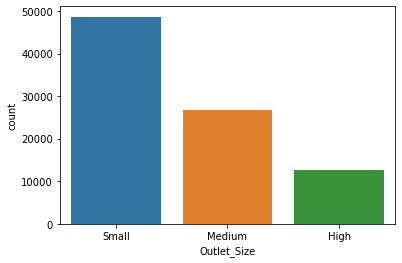

In [19]:
sns.countplot(train.Outlet_Size)

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

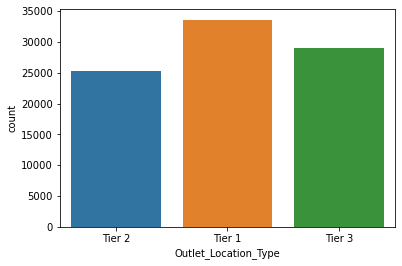

In [20]:
sns.countplot(train.Outlet_Location_Type)

In [26]:
# Splitting into numerical and categorical 

num = X.select_dtypes(include="number")
cat = X.select_dtypes(include="object")

In [27]:
num.head()

,Item_W,Item_MRP,Outlet_Year
0,21.027499,197.352319,2004
1,21.102371,148.250214,1987
2,20.882263,205.465010,1999
3,21.050435,253.417583,1996
4,21.247876,240.871039,1988


In [28]:
cat.head()

,Item_ID,Item_Type,Outlet_ID,Outlet_Size,Outlet_Location_Type
0,FDU32,Baking Goods,OUT046,Small,Tier 2
1,NCT54,Meat,OUT035,Small,Tier 1
2,FDW08,Hard Drinks,OUT035,Small,Tier 3
3,FDJ22,Starchy Foods,OUT046,Small,Tier 1
4,FDF47,Baking Goods,OUT035,Small,Tier 3


In [29]:
num.Outlet_Year.value_counts()

1997    16916
2004    15197
2009    13662
1999    13046
1987    10357
1996     4684
2003     4622
2008     4106
1998     3798
1988     1440
2007       20
2005       16
Name: Outlet_Year, dtype: int64

In [31]:
ind = num[['Outlet_Year']]
num.drop('Outlet_Year',axis=1,inplace=True)

In [32]:
num.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.9,0.99])

,Item_W,Item_MRP
count,87864.000000,87864.000000
mean,15.591469,151.242943
std,4.364429,59.536366
min,7.992700,32.910015
1%,8.441870,44.421314
5%,9.132131,55.072785
10%,9.648708,63.278082
25%,10.968658,112.423337
50%,15.831170,145.581473
75%,19.969936,197.110367


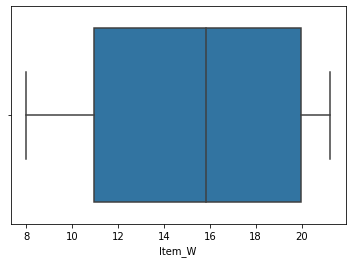

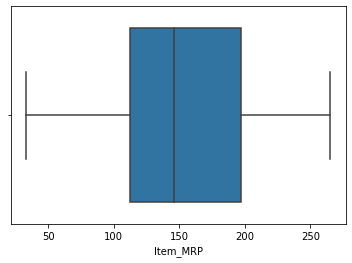

In [33]:
for i in num.columns:
  sns.boxplot(num[i])
  plt.show()

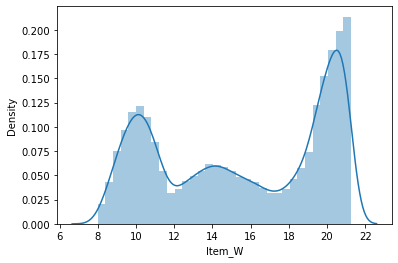

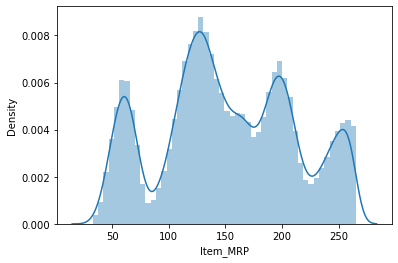

In [34]:
for i in num.columns:
  sns.distplot(num[i])
  plt.show()

In [35]:
def outlier_remove(x):
  x = x.clip(lower=x.quantile(0.01))
  x = x.clip(upper=x.quantile(0.99))
  return x

num = num.apply(lambda x:outlier_remove(x))

In [36]:
X_char_merged=pd.concat([y,cat],axis=1,join='inner')
X_char_merged

,Sales,Item_ID,Item_Type,Outlet_ID,Outlet_Size,Outlet_Location_Type
0,2689.457781,FDU32,Baking Goods,OUT046,Small,Tier 2
1,3437.350375,NCT54,Meat,OUT035,Small,Tier 1
2,3129.967268,FDW08,Hard Drinks,OUT035,Small,Tier 3
3,1306.514376,FDJ22,Starchy Foods,OUT046,Small,Tier 1
4,1739.769829,FDF47,Baking Goods,OUT035,Small,Tier 3
...,...,...,...,...,...,...
87859,4975.646052,FDG24,Breakfast,OUT035,Medium,Tier 3
87860,2252.492755,FDA32,Canned,OUT049,Medium,Tier 2
87861,2716.058050,FDM04,Household,OUT018,Medium,Tier 1
87862,991.857233,NCS18,Household,OUT018,Medium,Tier 3


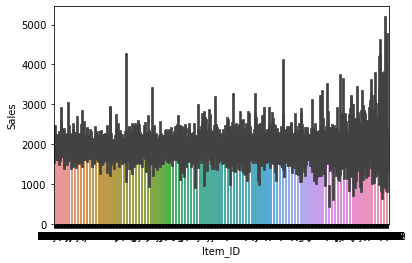

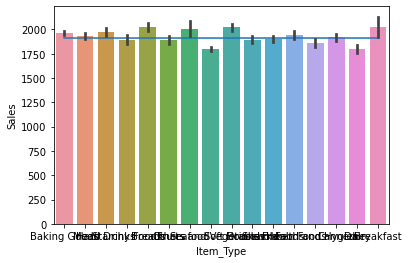

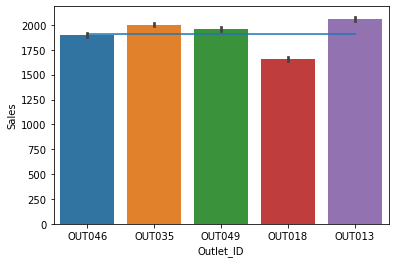

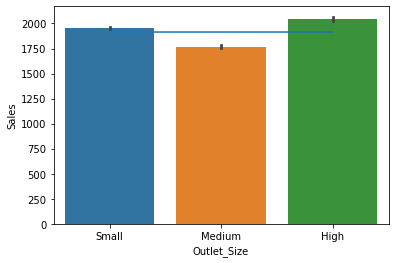

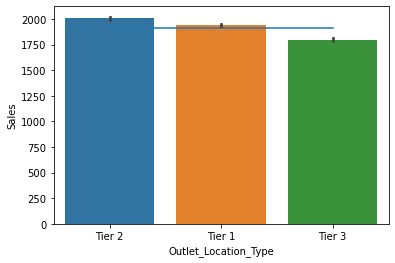

In [37]:
from numpy import mean
for col in (cat.columns):
    plt.figure()
    sns.lineplot(x=col,y=X_char_merged['Sales'].mean(),data=X_char_merged)
    sns.barplot(x=col, y="Sales",data=X_char_merged, estimator=mean )
plt.show()

In [38]:
cat=cat.drop(['Item_ID'],axis=1)

In [39]:
X_char_dum = pd.get_dummies(cat, drop_first = True)
X_char_dum.shape

(87864, 23)

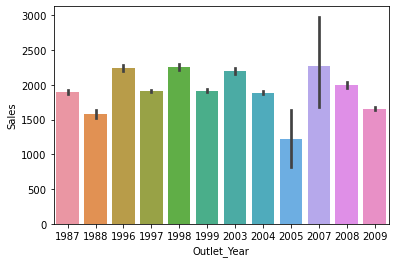

In [41]:
X_ind_merged=pd.concat([y,ind],axis=1,join='inner')
from numpy import mean
for col in (ind.columns):
    plt.figure()
    sns.barplot(x=col, y="Sales",data=X_ind_merged, estimator=mean )
plt.show()

In [42]:
select_features_df_ind=ind
X_all=pd.concat([X_char_dum,num,select_features_df_ind],axis=1,join="inner")

In [43]:
X_all.head()

,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,...,Outlet_ID_OUT035,Outlet_ID_OUT046,Outlet_ID_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Item_W,Item_MRP,Outlet_Year
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,0,21.027499,197.352319,2004
1,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,1,0,0,21.102371,148.250214,1987
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,1,20.882263,205.465010,1999
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,21.050435,253.417583,1996
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,1,21.203170,240.871039,1988


In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_all, y, test_size=0.3, random_state=10)

In [47]:
print("Shape of Training Data",X_train.shape)
print("Shape of Testing Data",X_test.shape)
print("Response Rate in Training Data",y_train.mean())
print("Response Rate in Testing Data",y_test.mean())

Shape of Training Data (61504, 26)
Shape of Testing Data (26360, 26)
Response Rate in Training Data Sales    1908.816259
dtype: float64
Response Rate in Testing Data Sales    1918.902156
dtype: float64


In [48]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor()
regr.fit(X_train, y_train)

RandomForestRegressor()

In [51]:
from sklearn.metrics import mean_squared_error

train_predicted=regr.predict(X_train)
np.sqrt(mean_squared_error(y_train, train_predicted))

494.72135098556504

In [52]:

test_predicted=regr.predict(X_test)
np.sqrt(mean_squared_error(y_test, test_predicted))

1327.1026824168682

In [53]:
test_predicted

array([1123.21444813, 1556.96815153, 1602.1576121 , ..., 1754.65489216,
       1587.4491394 , 2187.24058207])